In [43]:
import json
import random
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn.feature_extraction.text import TfidfVectorizer as tf
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import TruncatedSVD as tsvd

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import f1_score 
from sklearn.model_selection import GridSearchCV as gs

In [44]:
class Sentiment:
    NEGATIVE = 'NEGATIVE'
    POSITIVE = 'POSITIVE'

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if (self.score >= 3):
            return Sentiment.POSITIVE
        else:
            return Sentiment.NEGATIVE

class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews 
    
    def evenly_dist(self):
        neg = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        pos = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        
        pos_shrunk = pos[:len(neg)]
        self.reviews = (neg + pos_shrunk)
        random.shuffle(self.reviews)
        
    def get_feature(self):
        return [x.text for x in self.reviews]
    
    def get_label(self):
        return [x.sentiment for x in self.reviews]

In [45]:
# going to get the word embeddings like before but do pca and graph them
file_name = './books_small.json'

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))

In [46]:
# get text dataset for converting to word embeddings
xs = [x.text for x in reviews]

# get corresponding labels
ys = [x.sentiment for x in reviews]
# put into panda dataframe
y_df = pd.DataFrame(data=ys, columns={'sentiment'})

In [47]:
# word embedding time
vectorizer = tf()
x_vec = vectorizer.fit_transform(xs)

In [48]:
# need to standardise data
# x_vec = ss(with_mean=False).fit_transform(x_vec)

In [49]:
# pca time (need to use truncatedSVD since sparse matrix)
pca = tsvd(n_components=2)

# get top 2 PCs
x_pca = pca.fit_transform(x_vec)

# load into panda frame
x_df = pd.DataFrame(data=x_pca, columns={'PC1', 'PC2'})

# reunite with labels
final_df = pd.concat([x_df, y_df], axis=1)

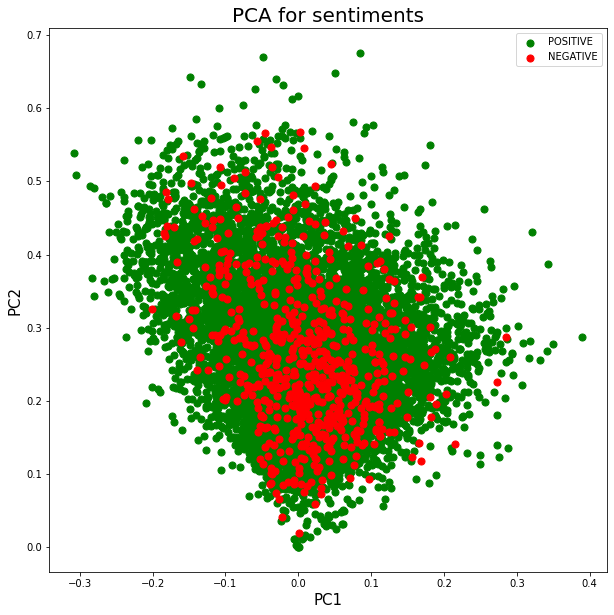

In [50]:
# plotting time
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('PCA for sentiments', fontsize=20)

# set up target labels and colours for them
targets = ['POSITIVE', 'NEGATIVE']
colours = ['g', 'r']

for target, colour in zip(targets, colours):
    indicesToKeep = final_df['sentiment'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC1'],
               final_df.loc[indicesToKeep, 'PC2'],
               c = colour,
               s = 50)
    ax.legend(targets)
    ax.grid()

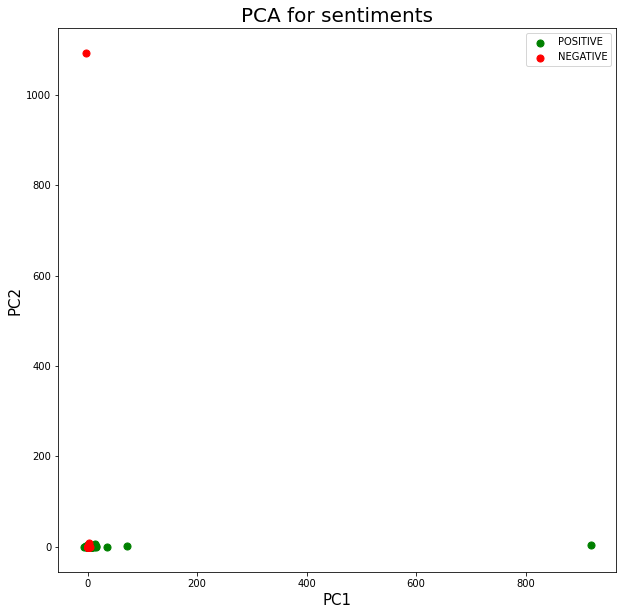

In [51]:
# trying again with standardised data 
x_vec = ss(with_mean=False).fit_transform(x_vec)

# pca time (need to use truncatedSVD since sparse matrix)
pca = tsvd(n_components=2)

x_pca = pca.fit_transform(x_vec)
x_df = pd.DataFrame(data=x_pca, columns={'PC1', 'PC2'})
final_df = pd.concat([x_df, y_df], axis=1)

# plotting time
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('PCA for sentiments', fontsize=20)

# set up target labels and colours for them
targets = ['POSITIVE', 'NEGATIVE']
colours = ['g', 'r']

for target, colour in zip(targets, colours):
    indicesToKeep = final_df['sentiment'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC1'],
               final_df.loc[indicesToKeep, 'PC2'],
               c = colour,
               s = 50)
    ax.legend(targets)
    ax.grid()

In [52]:
# the sets are very tangled, so linear separation is not feasible